### Visualization with Seaborn

• Matplotlib has proven to be an incredibly useful and popular visualization tool, but even avid users will admit it often leaves much to be desired. There are several valid complaints about Matplotlib that often come up:

• Prior to version 2.0, Matplotlib’s defaults are not exactly the best choices. It was based off of MATLAB circa 1999, and this often shows.

• Matplotlib’s API is relatively low level. Doing sophisticated statistical visualization is possible, but often requires a lot of boilerplate code.

• Matplotlib predated Pandas by more than a decade, and thus is not designed for use with Pandas DataFrame s. In order to visualize data from a Pandas DataFrame , you must extract each Series and often concatenate them together into the right format. It would be nicer to have a plotting library that can intelligently use the DataFrame labels in a plot.

• An answer to these problems is Seaborn. Seaborn provides an API on top of Matplotlib that offers sane choices for plot style and color defaults, defines simple high-level functions for common statistical plot types, and integrates with the functionality provided by Pandas DataFrames.

• To be fair, the Matplotlib team is addressing this: it has recently added the plt.style tools, and is starting to handle Pandas data more seamlessly. The 2.0 release of the library will include a new default stylesheet that will improve on the current status quo. But for all the reasons just discussed, Seaborn remains an extremely useful add-on.

### Seaborn Versus Matplotlib

• Here is an example of a simple random-walk plot in Matplotlib, using its classic plot formatting and colors.

• We start with the typical imports:

In [2]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

• Now we create some random walk data:

In [3]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

• And do a simple plot

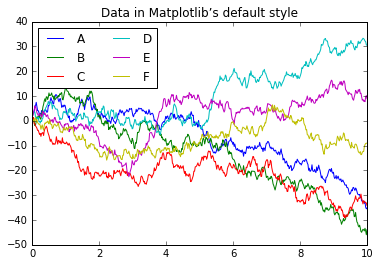

In [5]:
# plot the data with Matplotlib defaults
plt.plot(x, y)
plt.legend('ABCDEF', ncol = 2, loc = 'upper left')
plt.title('Data in Matplotlib’s default style');

• Although the result contains all the information we’d like it to convey, it does so in a way that is not all that aesthetically pleasing, and even looks a bit old-fashioned in the context of 21st-century data visualization.

• Now let’s take a look at how it works with Seaborn.

• As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib’s default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output.

• We can set the style by calling Seaborn’s set() method.

• By convention, Seaborn is imported as sns :

In [7]:
import seaborn as sns
sns.set()

• Now let’s rerun the same two lines as before

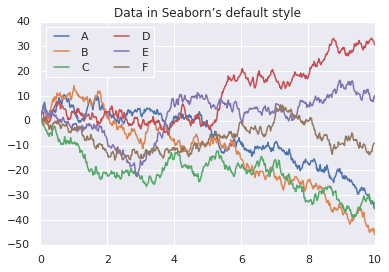

In [10]:
# Same plotting code as above
plt.plot(x, y)
plt.legend('ABCDEF', ncol = 2, loc = 'upper left')
plt.title('Data in Seaborn’s default style');